# Comparaison entrer les projections de SimGen et de certaines données exsistantes

## Effectuer une simulation avec Simgen


In [1]:
import sys
import warnings
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

Pour le moment, il faut changer les chemins pour les répertoires

In [2]:
sys.path.append('/Users/ydecarie/Documents/GitHub/simgen')

['/Users/ydecarie/Documents/GitHub/simgen/tests',
 '/Users/ydecarie/opt/anaconda3/lib/python37.zip',
 '/Users/ydecarie/opt/anaconda3/lib/python3.7',
 '/Users/ydecarie/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/Users/ydecarie/opt/anaconda3/lib/python3.7/site-packages',
 '/Users/ydecarie/opt/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Users/ydecarie/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/ydecarie/.ipython',
 '/Users/ydecarie/Documents/GitHub/simgen',
 '/Users/ydecarie/Documents/GitHub/simgen']

In [3]:
import simgen
from simgen import model

In [4]:
yr_debut=2017
yr_fin=2019

On simule la population jusqu'en {{yr_fin}}

In [5]:
base = model(start_yr=yr_debut,stop_yr=yr_fin)
base.startpop('/Users/ydecarie/Documents/GitHub/simgen/simgen/start_pop/startpopiso')
base.immig_assumptions(init='/Users/ydecarie/Documents/GitHub/simgen/simgen/start_pop/newimmpopiso')
base.birth_assumptions(scenario='reference')
base.dead_assumptions(scenario='low')
base.risk_iso_assumtions(params_set=1)

In [6]:
base.simulate(rep=1)

In [13]:
#base.stats.save('simpop_iso.pkl')

## Extraction des résultats
Creation de "DataFrame" contenant la population totale par sexe

In [7]:
base.stats.counts

2017          2018  \
age male  insch educ married nkids risk_iso                               
0   False False none False   0     False     41136.960108  42243.722081   
    True  False none False   0     False     43243.726267  41392.463198   
1   False False dec  False   0     False         0.000000      0.000000   
                             1     False         0.000000      0.000000   
                             2     False         0.000000      0.000000   
...                                                   ...           ...   
110 True  True  uni  True    1     False         0.000000      0.000000   
                             2     False         0.000000      0.000000   
                             3     False         0.000000      0.000000   
                             4     False         0.000000      0.000000   
                             5     False         0.000000      0.000000   

                                                     2019          2020  
age male  insch educ married nkids risk_iso                              
0   False False none False   0     False     41424.921127  41187.783784  
    True  False none False   0     False     42015.019718  42395.243243  
1   False False dec  False   0     False         0.000000      0.000000  
                             1     False         0.000000      0.000000  
                             2     False         0.000000      0.000000  
...                                                   ...           ...  
110 True  True  uni  True    1     False         0.000000      0.000000  
                             2     False         0.000000      0.000000  
                             3     False         0.000000      0.000000  
                             4     False         0.000000      0.000000  
                             5     False         0.000000      0.000000  

[21515 rows x 4 columns]

In [15]:
iso_65p=base.stats.freq('iso_smaf', sub='age>=75 and age <=84 and iso_smaf>0')
iso_65p=base.stats.prop('iso_smaf', sub='age>=75 and age <=84 and iso_smaf>0')
iso_65p.T[2020]

UndefinedVariableError: name 'iso_smaf' is not defined

In [ ]:
base.stats.freq('iso_smaf', sub='age>=75 and iso_smaf>0').plot.area()

In [ ]:
base.stats.freq('iso_smaf', sub='age>=85 and iso_smaf>0').plot.area()

In [ ]:
prop_2020_65=base.stats.freq('iso_smaf', sub='age>=65 and iso_smaf>0').T[2020]/base.stats.freq('iso_smaf', sub='age>=65 and iso_smaf>0').T[2020].sum()
prop_2020_65.plot.bar()

In [ ]:
prop_2020_75=(base.stats.freq('iso_smaf', sub='age>=75 and iso_smaf>0').T[2020]
              /base.stats.freq('iso_smaf', sub='age>=75 and iso_smaf>0').T[2020].sum())
prop_2020_75.plot.bar()

In [ ]:
prop_2020_85=(base.stats.freq('iso_smaf', sub='age>=85 and iso_smaf>0').T[2020]
              /base.stats.freq('iso_smaf', sub='age>=85 and iso_smaf>0').T[2020].sum())
prop_2020_85.plot.bar()

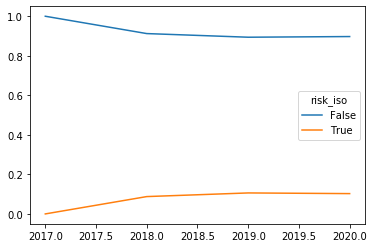

In [16]:
base.stats.prop('risk_iso', sub='age>=65 and age<70').plot()

In [ ]:
base.stats.prop('risk_iso', sub='age>=70 and age<75').plot()

In [ ]:
base.stats.prop('risk_iso', sub='age>=85').plot()

In [ ]:
base.stats.prop('risk_iso', sub='age>=95').plot()

In [ ]:
pop =base.stats.freq()
pop_m=base.stats.freq(sub='male==True')
pop_f=base.stats.freq(sub='male==False')

Creation de "DataFrame" contenant la populaton par groupe d'âge

In [ ]:
pop_age=base.stats.freq('age')
bins=[-1,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,101]
bins_3=[-1,24,64,101]
pop_age_gr=base.stats.freq('age', bins=bins)
pop_age_gr.columns= pop_age_gr.columns.astype('str')
pop_age_gr3=base.stats.freq('age', bins=bins_3)
pop_age_gr3.columns= pop_age_gr3.columns.astype('str')

In [ ]:
base.stats.freq('age', sub="age<=5").plot()

In [ ]:
base.stats.freq('age', sub="age>=6 and age<=10").plot()

In [ ]:
base.stats.freq('age', sub="age>=11 and age<=16").plot()

On charge ici les données provenant des derninères projections de l'ISQ. 

Il s'agit de projections de population basées sur le scénario moyen de l'ISQ à partir des données corrigées du recensement de 2016. Pour plus d'information concernant la méthodologie utilisée pour le calcul des projections de population, veuillez-vous référer au rapport « Perspectives démographiques du Québec et des régions, 2016-2066, édition 2019 » produit par l'ISQ à l'adresse suivante :

https://www.stat.gouv.qc.ca/statistiques/population-demographie/perspectives/perspectives-2016-2066.pdf

Pour la population de 1996-2018, il s'agit d'estimations de population constituant une série historique de populations comparables ayant servi à la construction des projections de population basées sur le recensement de 2016.

In [ ]:
pop_isq = pd.read_csv(path_data+'isq_pop_age_1996_2041.csv', sep=';')
pop_isq = pop_isq.set_index('year')

Population totale par âge sexe

In [ ]:
pop_isq_age = pop_isq.drop(['total'],axis=1)
pop_isq_age_tot=pop_isq_age.loc[pop_isq['sex']=='all']
pop_isq_age_tot_m=pop_isq_age.loc[pop_isq['sex']=='male']
pop_isq_age_tot_f=pop_isq_age.loc[pop_isq['sex']=='female']
pop_isq_age_tot = pop_isq_age_tot.drop(['sex'],axis=1)
pop_isq_age_tot_m = pop_isq_age_tot_m.drop(['sex'],axis=1)
pop_isq_age_tot_f = pop_isq_age_tot_f.drop(['sex'],axis=1)

Population par groupe d'âge

In [ ]:
pop_isq_age_tot_trans = pop_isq_age_tot.T
pop_isq_age_tot_trans
pop_isq_age_tot_trans['age']= range(0,91)
bins=list(range(0,96,5))
bins_3=[0,25,65,91]
pop_isq_age_tot_trans['agegr'] = pd.cut(pop_isq_age_tot_trans['age'], bins=bins, right=False)
gr=pop_isq_age_tot_trans.groupby(['agegr']).sum()
pop_isq_agegr_tot=gr.drop(['age'],axis=1).T
pop_isq_agegr_tot.columns= pop_isq_agegr_tot.columns.astype('str')
pop_isq_agegr_tot = pop_isq_agegr_tot[pop_isq_agegr_tot.index>=2017]
pop_isq_age_tot_trans['agegr'] = pd.cut(pop_isq_age_tot_trans['age'], bins=bins_3, right=False)
gr=pop_isq_age_tot_trans.groupby(['agegr']).sum()
pop_isq_agegr3_tot=gr.drop(['age'],axis=1).T
pop_isq_agegr3_tot.columns= pop_isq_agegr3_tot.columns.astype('str')
pop_isq_agegr3_tot = pop_isq_agegr3_tot[pop_isq_agegr3_tot.index>=2017]

Population totale par sexe

In [ ]:
pop_isq_total=pop_isq.loc[pop_isq['sex']=='all']
pop_isq_total =pop_isq_total['total']
pop_isq_total_m = pop_isq.loc[pop_isq['sex']=='male']
pop_isq_total_m =pop_isq_total_m['total']
pop_isq_total_f = pop_isq.loc[pop_isq['sex']=='female']
pop_isq_total_f =pop_isq_total_f['total']

## Figue comparaison population

### Population totale 

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(pop_isq_total, label='isq')
plt.plot(pop, label='simgen', linestyle='dashed')
plt.legend()
plt.title('Comparaison population totale')
plt.show()

### Comparaison popuation par sexe

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(pop_isq_total_m[pop_isq_total_m.index>=2017], label='isq')
plt.plot(pop_m, label='simgen', linestyle='dashed')
plt.legend()
plt.title('Comparaison population homme')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(pop_isq_total_f[pop_isq_total_m.index>=2017], label='isq')
plt.plot(pop_f, label='simgen', linestyle='dashed')
plt.legend()
plt.title('Comparaison population femme')
plt.show()

### Comparaison population par groupe d'âge

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr3_tot['[0, 25)'], label='isq 0-25', color='blue')
plt.plot(pop_isq_agegr3_tot['[25, 65)'], label='isq 25-65', color='green')
plt.plot(pop_isq_agegr3_tot['[65, 91)'], label='isq 65+', color='red')
plt.plot(pop_age_gr3['(-1, 24]'], label='simgen 0-25',color='blue', linestyle='dashed')
plt.plot(pop_age_gr3['(24, 64]'], label='simgen 25-65',color='green', linestyle='dashed')
plt.plot(pop_age_gr3['(64, 101]'], label='simgen 65+',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge")
plt.show()

### Comparaison groupe d'âge de 5 ans

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(pop_isq_agegr_tot['[0, 5)'], label='isq 0-5', color='blue')
plt.plot(pop_age_gr['(-1, 4]'], label='simgen 0-5',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[5, 10)'], label='isq 5-10', color='green')
plt.plot(pop_age_gr['(4, 9]'], label='simgen 5-10',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[10, 15)'], label='isq 10-15', color='red')
plt.plot(pop_age_gr['(9, 14]'], label='simgen 10-15',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 0-15")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr_tot['[15, 20)'], label='isq 15-20', color='blue')
plt.plot(pop_age_gr['(14, 19]'], label='simgen 15-20',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[20, 25)'], label='isq 20-25', color='green')
plt.plot(pop_age_gr['(19, 24]'], label='simgen 20-25',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[25, 30)'], label='isq 25-30', color='red')
plt.plot(pop_age_gr['(24, 29]'], label='simgen 25-30',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 15-30")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr_tot['[30, 35)'], label='isq 30-35', color='blue')
plt.plot(pop_age_gr['(29, 34]'], label='simgen 30-35',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[35, 40)'], label='isq 35-40', color='green')
plt.plot(pop_age_gr['(34, 39]'], label='simgen 35-40',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[40, 45)'], label='isq 40-45', color='red')
plt.plot(pop_age_gr['(39, 44]'], label='simgen 40-45',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 30-45")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr_tot['[45, 50)'], label='isq 45-50', color='blue')
plt.plot(pop_age_gr['(44, 49]'], label='simgen 45-50',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[50, 55)'], label='isq 50-55', color='green')
plt.plot(pop_age_gr['(49, 54]'], label='simgen 50-55',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[55, 60)'], label='isq 55-60', color='red')
plt.plot(pop_age_gr['(54, 59]'], label='simgen 55-60',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 45-60")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr_tot['[60, 65)'], label='isq 60-65', color='blue')
plt.plot(pop_age_gr['(59, 64]'], label='simgen 60-65',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[65, 70)'], label='isq 65-70', color='green')
plt.plot(pop_age_gr['(64, 69]'], label='simgen 65-70',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[70, 75)'], label='isq 70-75', color='red')
plt.plot(pop_age_gr['(69, 74]'], label='simgen 70-75',color='red', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 60-75")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(pop_isq_agegr_tot['[75, 80)'], label='isq 75-80', color='blue')
plt.plot(pop_age_gr['(74, 79]'], label='simgen 75-80',color='blue', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[80, 85)'], label='isq 80-85', color='green')
plt.plot(pop_age_gr['(79, 84]'], label='simgen 80-85',color='green', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[85, 90)'], label='isq 85-90', color='red')
plt.plot(pop_age_gr['(84, 89]'], label='simgen 70-75',color='red', linestyle='dashed')
plt.plot(pop_isq_agegr_tot['[90, 95)'], label='isq 90+', color='black')
plt.plot(pop_age_gr['(89, 101]'], label='simgen 90+',color='black', linestyle='dashed')
plt.legend()
plt.title("Comparaison groupe d'âge 75-90")
plt.show()

### Comparaison des naissances

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(pop_isq_age_tot.loc[2017:,'0'], label='isq', color='blue')
plt.plot(pop_age[0], label='simgen',color='blue', linestyle='dashed')
plt.legend()
plt.title("Naissances")
plt.show()

# Éducation

## Extraction des données SimGen

Prenant en compte school_done

In [ ]:
popeduc = base.stats.freq('educ')
propeduc15over = base.stats.prop('educ',sub='age>=15')
propeduc25overinsch = base.stats.prop('educ',sub='age>=25 and insch==False')
propeduc35overinsch = base.stats.prop('educ',sub='age>=35 and insch==False')
propeduc3544 = base.stats.prop('educ',sub='age>=35 and age<=44')
propeduc2564 = base.stats.prop('educ',sub='age>=25 and age<=64')
propeduc15overinsch = base.stats.prop('educ',sub='age>=15 and insch==False')
propeduc3544insch = base.stats.prop('educ',sub='age>=35 and age<=44 and insch==False')
propeduc2564insch = base.stats.prop('educ',sub='age>=25 and age<=64 and insch==False')

## Chargement des données isq

Source : Statistique Canada (SC), Enquête sur la population active (EPA), compilations de Statistique Canada et de l'Institut de la statistique du Québec réalisées grâce à l'accès aux données du Centre interuniversitaire québécois de statistiques sociales (CIQSS), membre du Réseau canadien des Centres de données de recherche (RCCDR). Adapté par l’Institut de la statistique du Québec (ISQ).

Mise à jour : 28 novembre 2019

https://www.stat.gouv.qc.ca/statistiques/education/niveau-scolarite/repartition-scol-ra-sexe-age.html#tri_tertr=50040000000000000&tri_sexe=1&tri_age=365&tri_stat=8403

In [ ]:
pop_educ = pd.read_csv(path_data+'educ4_qc2.csv', sep=';')
pop_educ = pop_educ[pop_educ['year']>=2000]

Préparation des données par groupe d'âge

In [ ]:
prop_educ_15over = pop_educ[pop_educ['age']=='15 ans et plus'] 
prop_educ_15over = prop_educ_15over[prop_educ_15over['sex']=='Total (hommes-femmes)']
prop_educ_15over = prop_educ_15over.set_index('year')
prop_educ_15over = prop_educ_15over.drop(columns=['age','sex','pop'])
prop_educ_3544 = pop_educ[pop_educ['age']=='35-44 ans'] 
prop_educ_3544 = prop_educ_3544[prop_educ_3544['sex']=='Total (hommes-femmes)']
prop_educ_3544 = prop_educ_3544.set_index('year')
prop_educ_3544 = prop_educ_3544.drop(columns=['age','sex','pop'])
prop_educ_2564 = pop_educ[pop_educ['age']=='25-64 ans'] 
prop_educ_2564 = prop_educ_2564[prop_educ_2564['sex']=='Total (hommes-femmes)']
prop_educ_2564 = prop_educ_2564.set_index('year')
prop_educ_2564 = prop_educ_2564.drop(columns=['age','sex','pop'])

Data Census 


In [ ]:
census_educ = pd.read_csv(path_data+'census_educ.csv', sep=";")
census_educ.head()

In [ ]:
prop_educ_15over = census_educ[census_educ['age']=='15 ans et plus'] 
prop_educ_15over = prop_educ_15over[prop_educ_15over['sex']=='Total (hommes-femmes)']
prop_educ_15over = prop_educ_15over.set_index('year')
prop_educ_15over = prop_educ_15over.drop(columns=['age','sex','pop'])
prop_educ_3544 = census_educ[census_educ['age']=='35-44 ans'] 
prop_educ_3544 = prop_educ_3544[prop_educ_3544['sex']=='Total (hommes-femmes)']
prop_educ_3544 = prop_educ_3544.set_index('year')
prop_educ_3544 = prop_educ_3544.drop(columns=['age','sex','pop'])
prop_educ_2564 = census_educ[census_educ['age']=='25-64 ans'] 
prop_educ_2564 = prop_educ_2564[prop_educ_2564['sex']=='Total (hommes-femmes)']
prop_educ_2564 = prop_educ_2564.set_index('year')
prop_educ_2564 = prop_educ_2564.drop(columns=['age','sex','pop'])

In [ ]:
prop_educ_65p = census_educ[census_educ['age']=='65 ans et plus ans'] 
prop_educ_65p = prop_educ_65p[prop_educ_65p['sex']=='Total (hommes-femmes)']
prop_educ_65p = prop_educ_65p.set_index('year')
prop_educ_65p = prop_educ_65p.drop(columns=['age','sex','pop'])

In [ ]:
prop_educ_65p

In [ ]:
propeduc65over = base.stats.prop('educ',sub='age>65 and age<=69')
propeduc65over

Petite fonction pour graphiques d'éducation

In [ ]:
def graph_educ(isq,simgen,title, save=False, save_path=None, save_name=None):
    plt.figure(figsize=(10,5))
    plt.plot(isq['prop'][isq['educ4']=='uni'],label='census uni', color='blue')
    plt.plot(simgen['uni'], label='simgen uni',color='blue', linestyle='dashed')
    plt.plot(isq['prop'][isq['educ4']=='dec'],label='census dec', color='green')
    plt.plot(simgen['dec'], label='simgen dec',color='green', linestyle='dashed')
    plt.plot(isq['prop'][isq['educ4']=='des'],label='census des', color='red')
    plt.plot(simgen['des'], label='simgen des',color='red', linestyle='dashed')
    plt.plot(isq['prop'][isq['educ4']=='none'],label='census none', color='black')
    plt.plot(simgen['none'], label='simgen des',color='black', linestyle='dashed')
    plt.legend()
    plt.title(title)
    if save:
        #plt.savefig(save_path + save_name + '.jpg')
        plt.savefig(save_path + save_name + '.png')
    plt.show()

### Graphiques comparaison éducation

In [ ]:
graph_educ(isq=prop_educ_15over,simgen=propeduc15overinsch,title='Éducation 15 ans et plus')

In [ ]:
graph_educ(isq=prop_educ_3544, simgen=propeduc3544insch, title='Éducation 35-44 ans')

In [ ]:
graph_educ(isq=prop_educ_2564,simgen=propeduc2564,
           title="Figure3: Proportion de la population par niveau de scolarité, 25-64 ans, Québec, 2006-2040",
          save=True, save_path="/Users/ydecarie/Dropbox (CEDIA)/OLG_CAN/demo/simgen-docs/figure/",
          #save=True, save_path="/Users/juliennavaux/Dropbox (CEDIA)/OLG_CAN/demo/simgen-docs/figure/",
          save_name="educ_2564")

In [ ]:
graph_educ(isq=prop_educ_2564,simgen=propeduc2564insch,title='Éducation 25-64 ans')

## Comparaison des personnes en couple



### Extraction données SimGen

Proportion des personnes en couple par groupe d'âge

In [ ]:
popms = base.stats.freq('married')
propms15plus = base.stats.prop('married', sub="age>=15")
propms1544 = base.stats.prop('married', sub="age>=15 and age<=44")
propms4564 = base.stats.prop('married', sub="age>=45 and age<=64")
propms65plus = base.stats.prop('married', sub="age>=65")
propms15plus.columns= propms15plus.columns.astype('str')
propms1544.columns= propms1544.columns.astype('str')
propms4564.columns= propms4564.columns.astype('str')
propms65plus.columns= propms65plus.columns.astype('str')

### Extraction données Statistique Canada

Estimations de la population au 1er juillet, selon l'état matrimonial ou l'état matrimonial légal, l'âge et le sexe, Tableau : 17-10-0060-01

https://www150.statcan.gc.ca/t1/tbl1/fr/cv.action?pid=1710006001

In [ ]:
pop_ms = pd.read_csv(path_data+'married_qc.csv', sep=';')
pop_ms=pop_ms[pop_ms['married']==1]
pop_ms_15plus = pop_ms[pop_ms["age"]=="15 ans et plus"]
pop_ms_15plus = pop_ms_15plus.set_index(pop_ms_15plus["year"])
pop_ms_1544 = pop_ms[pop_ms["age"]=="15 à 44 ans"]
pop_ms_1544 = pop_ms_1544.set_index(pop_ms_1544["year"])
pop_ms_4564 = pop_ms[pop_ms["age"]=="45 à 64 ans"]
pop_ms_4564 = pop_ms_4564.set_index(pop_ms_4564["year"])
pop_ms_65plus = pop_ms[pop_ms["age"]=="65 ans et plus"]
pop_ms_65plus = pop_ms_65plus.set_index(pop_ms_65plus["year"])

Petite fonction pour graphiques de comparaison des unions

In [ ]:
def graph_union(isq,simgen,title, save=False, save_path=None, save_name=None):
    plt.figure(figsize=(10,5))
    plt.plot(isq['prop'], label='isq couple',color='blue')
    plt.plot(1-isq['prop'],label="isq single",color='green')
    plt.plot(simgen["True"],label="simgen couple", color="blue", linestyle='dashed')
    plt.plot(1-simgen["True"], label='simgen single',color='green', linestyle='dashed')
    plt.legend()
    plt.title(title)
    if save:
        #plt.savefig(save_path + save_name + '.jpg')
        plt.savefig(save_path + save_name + '.png')

### Graphiques comparaioson des personnes en couple par groupe d'âge

In [ ]:
graph_union(pop_ms_15plus,propms15plus,title=" Figure 4: Proportion des personnes de 15 ans et plus en couple, Québec, 2000-2040", save=True,
            save_path="/Users/ydecarie/Dropbox (CEDIA)/OLG_CAN/demo/simgen-docs/figure/", 
            #save_path="/Users/juliennavaux/Dropbox (CEDIA)/OLG_CAN/demo/simgen-docs/figure/",
            save_name="union_15over")

In [ ]:
graph_union(pop_ms_1544,propms1544,title="Union 15-44 ans")

In [ ]:
graph_union(pop_ms_4564,propms4564,title="Union 45-64 ans")

In [ ]:
graph_union(pop_ms_65plus,propms65plus,title="Union 65 plus")

Comparaison education données de Statistiques Canada

In [ ]:
pop_educ_stc = pd.read_csv(path_data+'educ4_qc_stc.csv', sep=';')
pop_educ_stc = pop_educ_stc[pop_educ_stc['year']>=2000]
pop_educ_stc

In [ ]:
prop_educ_stc_15over = pop_educ_stc[pop_educ_stc['age']=='15 ans et plus'] 
prop_educ_stc_15over = prop_educ_stc_15over[prop_educ_stc_15over['sex']=='Total (hommes-femmes)']
prop_educ_stc_15over = prop_educ_stc_15over.set_index('year')
prop_educ_stc_15over = prop_educ_stc_15over.drop(columns=['age','sex','pop'])
prop_educ_stc_25over = pop_educ_stc[pop_educ_stc['age']=='25 ans et plus'] 
prop_educ_stc_25over = prop_educ_stc_25over[prop_educ_stc_25over['sex']=='Total (hommes-femmes)']
prop_educ_stc_25over = prop_educ_stc_25over.set_index('year')
prop_educ_stc_25over = prop_educ_stc_25over.drop(columns=['age','sex','pop'])

prop_educ_stc_35over = pop_educ_stc[pop_educ_stc['age']=='25 ans et plus'] 
prop_educ_stc_35over = prop_educ_stc_35over[prop_educ_stc_35over['sex']=='Total (hommes-femmes)']
prop_educ_stc_35over = prop_educ_stc_35over.set_index('year')
prop_educ_stc_35over = prop_educ_stc_35over.drop(columns=['age','sex','pop'])

prop_educ_stc_3544 = pop_educ_stc[pop_educ_stc['age']=='35-44 ans'] 
prop_educ_stc_3544 = prop_educ_stc_3544[prop_educ_stc_3544['sex']=='Total (hommes-femmes)']
prop_educ_stc_3544 = prop_educ_stc_3544.set_index('year')
prop_educ_stc_3544 = prop_educ_stc_3544.drop(columns=['age','sex','pop'])
prop_educ_stc_2564 = pop_educ_stc[pop_educ_stc['age']=='25-64 ans'] 
prop_educ_stc_2564 = prop_educ_stc_2564[prop_educ_stc_2564['sex']=='Total (hommes-femmes)']
prop_educ_stc_2564 = prop_educ_stc_2564.set_index('year')
prop_educ_stc_2564 = prop_educ_stc_2564.drop(columns=['age','sex','pop'])

In [ ]:
graph_educ(isq=prop_educ_stc_25over,simgen=propeduc25overinsch,title='Éducation 25 ans et plus')

In [ ]:
prop_educ_stc_35over

In [ ]:
prop_educ_15over

In [ ]:
graph_educ(isq=prop_educ_stc_35over, simgen=propeduc35overinsch, title="")

## Graphique Étudiants

In [ ]:
base.stats.freq("age", sub='insch==True and age>=17 and age<=35').T.sum().plot()

In [ ]:
base.stats.freq("age", sub='age>=16 and age <25').plot()

## Famille

In [ ]:
base.stats.freq("nkids", sub="nkids>0").T.sum().plot()

In [ ]:
kids_count = [0,1,2,8]
base.stats.freq("nkids", bins=kids_count).plot()

In [ ]:
nkids_couple=base.stats.freq("nkids", bins=kids_count, sub="married==True")
nkids_couple=nkids_couple/2
nkids_couple.plot()

In [ ]:
nkids_single=base.stats.freq("nkids", bins=kids_count, sub="married==False")
nkids_single.plot()

In [ ]:
nkids= nkids_couple+nkids_single
nkids.plot()

In [ ]:
bk = [0, 8]
kids_couple=base.stats.freq("nkids", bins=bk, sub="married==True")
kids_couple=kids_couple/2
kids_single=base.stats.freq("nkids", bins=bk, sub="married==False")
kids = kids_single+kids_couple
kids.plot()

In [ ]:
base.stats.freq('age', sub="age==18").plot()

In [ ]:
base.stats.freq("age", sub="insch==True and age>34").T.sum().plot()

In [ ]:
base.stats.freq("age", sub="insch==True and age>=35 and age<=65").T.sum().plot()

In [ ]:
base.stats.freq("age", sub="insch==True and age>=35 and age<=45").plot()